<a href="https://colab.research.google.com/github/bibhabasumohapatra/Decline-Curve-Analysis/blob/main/OIL_FIELD_PART_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating Data

---



In [ ]:
path = '/content/drive/MyDrive/Prodn_03-2021 - Prod.csv'

In [ ]:
df = pd.read_csv(path)
df = df[(df['OILCM'].notnull()) & (df['OILCM']>0)]
df = df[(df['LIQUID'].notnull()) & (df['LIQUID']>0)]
df = df[(df['WATER'].notnull()) & (df['WATER']>0)]

In [ ]:
# df['OILCM'] = df['OILCM']/df['FDAYS']
# df['LIQUID'] = df['LIQUID']/df['FDAYS']
# df['OILCM'] = df['OILCM']/df['FDAYS']

In [ ]:
df = df[df['WLNO']=='MAN36']
arr = []
for i in range(len(df)):
  arr.append(i)

FINAL USED DATA

In [ ]:
time = arr ##in days
OIL = df['OILCM'].to_list()
WATER = df['WATER'].to_list()
LIQUID = df['LIQUID'].to_list()  

In [ ]:
qi = 624

In [ ]:
OIL = torch.tensor(OIL).unsqueeze(1)
WATER = torch.tensor(WATER).unsqueeze(1)
LIQUID = torch.tensor(LIQUID).unsqueeze(1)
time = torch.tensor(time).unsqueeze(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy 

Main work -- Mechanics of learning starts here

In [ ]:
def hyperbolic_equation(t, qi, b, di):
    return qi/((1.0+b*di*t)**(1.0/b))

In [ ]:
def loss_fn(q,q_0):
  squared_diff = (q - q_0)**2
  return squared_diff.mean()

In [ ]:
# optimizers 
import torch.optim as optim

In [ ]:
params = torch.tensor([qi,1.0,0.0],requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params],lr=learning_rate)

In [ ]:
q = hyperbolic_equation(time,*params)
loss = torch.nn.MSELoss(q,OIL)

optimizer.zero_grad()
loss.backward()
optimizer.step()

print(params)

RuntimeError: ignored

In [ ]:
def training_loop(n_epochs,optimizer,params,t,OIL):
  for epochs in range(1,n_epochs+1):
    q = hyperbolic_equation(time,*params)
    loss = torch(q,OIL)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()  

    if epochs%5000 == 0:
       print('Epoch %d, Loss %f'%(epochs,float(loss)))
  return params    

In [ ]:
params = torch.tensor([qi,1.0,0.0],requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params],lr=learning_rate)
training_loop(
    n_epochs = 50000,
    optimizer = optimizer,
    params = params,
    t = time,
    OIL = OIL
)

Epoch 5000, Loss 6800.770020
Epoch 10000, Loss 6792.202637
Epoch 15000, Loss 6795.818359
Epoch 20000, Loss 6792.515137
Epoch 25000, Loss 6796.008301
Epoch 30000, Loss 6792.393066
Epoch 35000, Loss 6792.771973
Epoch 40000, Loss 6792.597656
Epoch 45000, Loss 6793.457031
Epoch 50000, Loss 6792.667969


tensor([6.5363e+02, 5.2485e-01, 1.7085e-02], requires_grad=True)

In [ ]:
final = [6.5363e+02, 5.2485e-01, 1.7085e-02]

In [ ]:
time_temp = []
for i in range(200):
  time_temp.append(i)
time_temp = torch.tensor(time_temp)

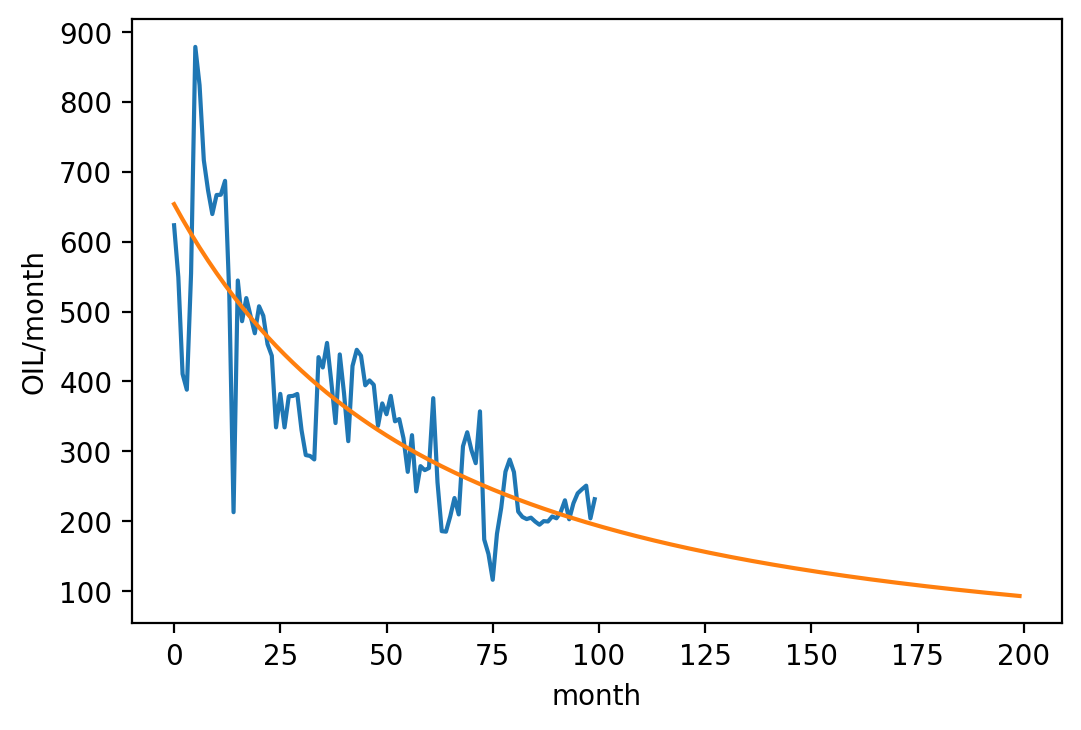

In [ ]:
q_final = hyperbolic_equation(time_temp,*final)
fig = plt.figure(dpi=200)
plt.xlabel('month')
plt.ylabel('OIL/month')
plt.plot(time.numpy(),OIL.numpy())
plt.plot(time_temp.numpy(),q_final.numpy())